In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib 
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from utils import *
import warnings
warnings.filterwarnings('ignore')

# Dataset
* we combine the three datasets into one dataframe as we are not evaluating anything specific to region

In [2]:
game_data_kr = pd.read_csv("/course/data/a2/games/KRmatch.csv")
game_data_na = pd.read_csv("/course/data/a2/games/NAmatch.csv")
game_data_eu = pd.read_csv("/course/data/a2/games/EUmatch.csv")

df = pd.concat([game_data_kr, game_data_na, game_data_eu])
display(df)

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
0,14.0,4.0,Leona,Side.blue,6.0,NaN,0.0,0.0,6.0,1.333333,NaN,9.0,23.0,9404.0,0.0,47.0,15214,6043,Other,Few
1,NaN,4.0,Udyr,NaN,8.0,547.0,46480.0,547.0,3.0,6.666667,12.0,16.0,32.0,25782.0,NaN,20.0,194463,12919,TopLane_Jungle,Few
2,14.0,4.0,Xerath,Side.red,2.0,168.0,444.0,168.0,7.0,NaN,0.0,10.0,22.0,14079.0,0.0,38.0,34038,5641,Other,Few
3,14.0,4.0,Zoe,Side.red,8.0,NaN,3082.0,2492.0,3.0,5.000000,7.0,14.0,29.0,11128.0,2.0,NaN,94369,10688,Other,Many
4,4.0,12.0,Camille,Side.red,8.0,6419.0,NaN,6419.0,5.0,4.200000,13.0,15.0,25.0,20404.0,2.0,24.0,110580,12368,TopLane_Jungle,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,3.0,4.0,Zilean,NaN,21.0,1020.0,3234.0,1020.0,4.0,6.000000,3.0,12.0,27.0,12157.0,1.0,86.0,20751,7875,Other,Few
5767,11.0,4.0,Zed,Side.red,10.0,2306.0,8305.0,2306.0,7.0,3.428571,14.0,15.0,5.0,28430.0,1.0,19.0,167502,13741,TopLane_Jungle,Few
5768,4.0,3.0,Lulu,Side.red,19.0,1552.0,2019.0,1552.0,8.0,2.625000,2.0,12.0,30.0,17652.0,1.0,67.0,16182,8168,Other,Few
5769,6.0,4.0,Tryndamere,Side.red,0.0,4680.0,24114.0,4680.0,4.0,0.250000,1.0,14.0,6.0,18691.0,2.0,13.0,159259,10808,TopLane_Jungle,Many


# Standardising and Normalisation
* standardise the data to be 'per level' by dividing every column by level and normalise the data to be between 0 and 1

In [3]:
def per_level(val, level):
    return val/level

def normalise(x):
    return ( (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x)) )

In [4]:
# normalising the data to [0, 1]
new_col_arrangement = []
for col in df.columns:
    new_col_arrangement.append(col)
    if col == "level":
        continue
    try:
        # standardise data to be 'per level' and normalise to [0..1]
        df[f'per_level_{col}'] = per_level(df[col], df['level'])
        new_col_arrangement.append(f"per_level_{col}")
        df[f'normalised_{col}'] = normalise(df[f'per_level_{col}'])
        new_col_arrangement.append(f"normalised_{col}")
    except:
        print(f'Invalid col: {col}')
df = df[new_col_arrangement]
display(df.head(10))

Invalid col: champion
Invalid col: side
Invalid col: role
Invalid col: minions_killed


,d_spell,per_level_d_spell,normalised_d_spell,f_spell,per_level_f_spell,normalised_f_spell,champion,side,assists,per_level_assists,...,per_level_vision_score,normalised_vision_score,damage_total,per_level_damage_total,normalised_damage_total,gold_earned,per_level_gold_earned,normalised_gold_earned,role,minions_killed
0,14.0,1.555556,0.583784,4.0,0.444444,0.170732,Leona,Side.blue,6.0,0.666667,...,5.222222,0.443645,15214,1690.444444,0.039084,6043,671.444444,0.238702,Other,Few
1,NaN,NaN,NaN,4.0,0.250000,0.085366,Udyr,NaN,8.0,0.500000,...,1.250000,0.100719,194463,12153.937500,0.380338,12919,807.437500,0.351783,TopLane_Jungle,Few
2,14.0,1.400000,0.523243,4.0,0.400000,0.151220,Xerath,Side.red,2.0,0.200000,...,3.800000,0.320863,34038,3403.800000,0.094963,5641,564.100000,0.149444,Other,Few
3,14.0,1.000000,0.367568,4.0,0.285714,0.101045,Zoe,Side.red,8.0,0.571429,...,NaN,NaN,94369,6740.642857,0.203790,10688,763.428571,0.315189,Other,Many
4,4.0,0.266667,0.082162,12.0,0.800000,0.326829,Camille,Side.red,8.0,0.533333,...,1.600000,0.130935,110580,7372.000000,0.224381,12368,824.533333,0.365998,TopLane_Jungle,Many
5,4.0,0.363636,0.119902,14.0,1.272727,0.534368,Alistar,Side.red,14.0,1.272727,...,2.727273,0.228254,17852,1622.909091,0.036881,6471,588.272727,0.169544,Other,Few
6,14.0,1.076923,0.397505,4.0,0.307692,0.110694,Thresh,Side.red,NaN,NaN,...,4.846154,0.411179,20610,1585.384615,0.035657,8208,631.384615,0.205392,Other,Few
7,3.0,0.176471,0.047059,4.0,0.235294,0.078910,Xayah,NaN,9.0,0.529412,...,2.235294,0.185781,244314,14371.411765,0.452658,16108,947.529412,0.468271,Other,Many
8,4.0,0.285714,0.089575,12.0,0.857143,0.351916,Sylas,Side.blue,10.0,0.714286,...,0.785714,0.060637,116207,8300.500000,0.254663,10734,766.714286,0.317921,Other,Many
9,11.0,0.916667,0.335135,4.0,0.333333,0.121951,XinZhao,Side.blue,2.0,0.166667,...,2.000000,0.165468,110857,9238.083333,0.285241,10050,837.500000,0.376780,TopLane_Jungle,Few


Remove unused columns based on domain knowledge

In [5]:
df.drop('side', axis=1, inplace=True)
df.drop('champion', axis=1, inplace=True)
df.drop('normalised_damage_objectives', axis=1, inplace=True)


# Train-Test Split
* 80% training and 20% testing

In [6]:
df_train, df_test = train_test_split(df, train_size=0.8,test_size=0.2, random_state=101)

# Data Imputation
* replaced null values with the median

In [7]:
imp_median = SimpleImputer(strategy="median")

for name, value in df_train.iteritems():
    i = 0
    while not value.values[i]:
        i += 1

    if not isinstance(value.values[i], str):
        imp_median.fit(df_train[[name]])
        df_train[[name]] = imp_median.transform(df_train[[name]])
        df_test[[name]] = imp_median.transform(df_test[[name]])

df_train.head(10)

,d_spell,per_level_d_spell,normalised_d_spell,f_spell,per_level_f_spell,normalised_f_spell,assists,per_level_assists,normalised_assists,damage_objectives,...,per_level_vision_score,normalised_vision_score,damage_total,per_level_damage_total,normalised_damage_total,gold_earned,per_level_gold_earned,normalised_gold_earned,role,minions_killed
1775,11.0,0.733333,0.263784,4.0,0.266667,0.092683,11.0,0.733333,0.235714,563.0,...,1.466667,0.119424,183449.0,12229.933333,0.382817,12618.0,841.200000,0.379857,TopLane_Jungle,Few
3992,12.0,0.750000,0.270270,4.0,0.250000,0.085366,7.0,0.500000,0.160714,3056.0,...,2.187500,0.181655,142037.0,8877.312500,0.273475,13033.0,814.562500,0.357707,Other,Many
3800,4.0,0.266667,0.082162,11.0,0.733333,0.297561,7.0,0.466667,0.150000,1189.0,...,1.933333,0.159712,149261.0,9950.733333,0.308483,11872.0,791.466667,0.338503,TopLane_Jungle,Few
1995,4.0,0.375000,0.124324,4.0,0.250000,0.085366,9.0,0.562500,0.180804,7132.0,...,2.062500,0.170863,171567.0,10722.937500,0.333668,12686.0,792.875000,0.339674,TopLane_Jungle,Many
2838,4.0,0.285714,0.089575,7.0,0.500000,0.195122,10.0,0.714286,0.229592,5394.0,...,2.142857,0.177801,100647.0,7189.071429,0.218415,10398.0,742.714286,0.297964,Other,Many
1452,14.0,0.823529,0.298887,4.0,0.235294,0.078910,4.0,0.235294,0.075630,8888.0,...,1.705882,0.140076,193508.0,11382.823529,0.355189,16267.0,956.882353,0.476048,Other,Many
3514,14.0,0.933333,0.341622,12.0,0.800000,0.326829,2.0,0.133333,0.042857,1016.0,...,0.866667,0.067626,136402.0,9093.466667,0.280524,12570.0,838.000000,0.377196,Other,Many
314,11.0,1.000000,0.367568,4.0,0.363636,0.135255,1.0,0.090909,0.029221,1534.0,...,1.454545,0.118378,122250.0,11113.636364,0.346410,7587.0,689.727273,0.253905,TopLane_Jungle,Few
4086,14.0,1.272727,0.473710,4.0,0.363636,0.135255,7.0,0.500000,0.160714,345.0,...,3.181818,0.267495,12594.0,1144.909091,0.021292,6632.0,602.909091,0.181714,Other,Few
3939,4.0,0.285714,0.089575,6.0,0.428571,0.163763,5.0,0.357143,0.114796,3467.0,...,0.928571,0.072970,127987.0,9141.928571,0.282105,11142.0,795.857143,0.342153,Other,Many


Filter believability using domain knowledge

In [8]:
def filter_believability(input_df):
    filtered_data = []
    for index,row in input_df.iterrows():
        if not ((row['damage_turrets'] == 0) and (row['turret_kills'] != 0)):
            filtered_data.append(row)
        if (row['turret_kills'] > 11):
            print(row['turret_kills'])
        if (row['level'] > 18):
            print(row['level'])

    filtered_data = pd.DataFrame(filtered_data,columns=list(df.columns))
    return filtered_data

In [9]:
df_train = filter_believability(df_train)
df_test = filter_believability(df_test)

# K-nearest neighbour

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif as MIC
from collections import defaultdict

In [11]:
def k_fold_cross_validation(filtered_features, k_fold):
    """
    Perform k-fold cross validation using k-nearest neighbour
    """
    kf_CV = KFold(n_splits=k_fold, shuffle=True, random_state=42)
    results = defaultdict(lambda: defaultdict(list))
    for train_idx, test_idx in kf_CV.split(df_train):
        # train-test split
        X_train, X_test = df_train[filtered_features].iloc[list(train_idx)], df_train[filtered_features].iloc[list(test_idx)]
        Y_train, Y_test = df_train['role'].iloc[list(train_idx)], df_train['role'].iloc[list(test_idx)]
        
        for knn_k in range(3, 8):
            # Training
            knn = KNeighborsClassifier(n_neighbors=knn_k)
            knn.fit(X_train, Y_train)
            
            # Prediction
            Y_pred = knn.predict(X_test)

            # Confusion matrix
            cm = confusion_matrix(Y_test, Y_pred)
            curr_result = calc_and_print_metrics(cm, False)

            # Adding accuracy and precision
            results[knn_k]["accuracy"].append(curr_result["accuracy"])
            results[knn_k]["precision"].append(curr_result["precision"])

            # Calculating the mean accurary and precision
            results[knn_k]["mean_accuracy"] = np.mean(results[knn_k]["accuracy"])
            results[knn_k]["mean_precision"] = np.mean(results[knn_k]["precision"])

            results[knn_k]["average"] = (results[knn_k]["mean_accuracy"] + results[knn_k]["mean_precision"])/2
    return results

Tune hyper-parameters for k-nearest neighbor algorithm:
- Selecting appropriate k for k-fold cross validation
- varying the number of k-nearest neighbors
- determining the threshold Mutual Information used for feature selection

In [18]:
X_COLS = ['normalised_d_spell', 'normalised_f_spell', 'normalised_assists', 'normalised_damage_building', 'normalised_damage_turrets', 'normalised_deaths', 'normalised_kda', 'normalised_kills', 'normalised_time_cc', 'normalised_damage_taken', 'normalised_turret_kills', 'normalised_vision_score', 'normalised_damage_total', 'normalised_gold_earned']
Y_COL = 'role'

X_train = df_train[X_COLS]
Y_train = df_train[Y_COL]
X_test = df_test[X_COLS]
Y_test = df_test[Y_COL]

def rec_dd():
    return defaultdict(rec_dd)
knn_final_results = rec_dd()
"""final_results format
{
    k_fold: {
        mi_threshold: {
            knn: {
                "accuracy": [kfold1, kfold2, ...],
                "precision": [kfold1, kfold2, ...]
                "mean_accuracy": ...,
                "mean_precision": ...,
                "average": ...
            }
        }
    }
}
"""
mi_arr = MIC(X=X_train, y=Y_train, discrete_features=True) #Utilizing mutual information
for k_fold in range(5, 12):
    for mi_threshold in {0, 0.1, 0.2}:
        filtered_features = []
        for feature, mi in zip(X_train.columns, mi_arr):
            if(mi >= mi_threshold): # Filtering out any features below threshold
                filtered_features.append(feature)
        knn_final_results[k_fold][mi_threshold] = k_fold_cross_validation(filtered_features, k_fold)

In [29]:
print(np.mean(knn_final_results[7][0.1][4]["accuracy"]))
print(np.mean(knn_final_results[7][0.1][4]["precision"]))

0.8205959745341922
0.9237393494843367


In [12]:
def graph(dictionary, isKNN=True):
    """
    Plots 3 graphs
    """
    colours = {3:"red", 4:"orange", 5:"green", 6:"blue", 7:"purple", 0: "red", 0.1: "green", 0.2: "blue"}
    kfold_set = [x for x in range(5, 12)]
    mi_set = [0, 0.1, 0.2]
    if isKNN:
        knn_set = [x for x in range(3, 8)]
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), dpi=300)
        for i in range(len(mi_set)): #0
            mi = mi_set[i]
            for knn in knn_set: #3
                knn_accuracy = []
                knn_precision = []
                for kfold in kfold_set: #5
                    knn_accuracy.append(dictionary[kfold][mi][knn]['mean_accuracy'])
                    knn_precision.append(dictionary[kfold][mi][knn]['mean_precision'])

                # Graph and Annotate Accuracy
                axes[i].plot(kfold_set, knn_accuracy, marker='o',label=f"{knn}_knn_accuracy", color=colours[knn])
                axes[i].text(kfold_set[-1], knn_accuracy[-1], f"{knn}_knn_accuracy", {"color":colours[knn]})

                # Graph and Annotate Precision
                axes[i].plot(kfold_set, knn_precision, marker='o', label=f"{knn}_knn_precision", color=colours[knn])
                axes[i].text(kfold_set[-1], knn_precision[-1], f"{knn}_knn_precision", {"color":colours[knn]})

                axes[i].set_xlabel("K-fold")
                axes[i].set_ylabel("Precision/Accuracy")
                # plt.ylim((None,1))
                axes[i].set_title(f"Precision and Accuracy of KNN\nwith MI Threshold of {mi}")
                # axes[i].legend.set_text(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        fig.tight_layout()
        plt.savefig('knn_precision_and_accuracy.png', dpi=300)
    else:
        fig, axes = plt.subplots(dpi=300)
        for mi in mi_set:
            dt_accuracy = []
            dt_precision = []
            for k_fold in kfold_set:
                dt_accuracy.append(dictionary[k_fold][mi]['accuracy'])
                dt_precision.append(dictionary[k_fold][mi]['precision'])
            # Graph and Annotate Accuracy
            axes.plot(kfold_set, dt_accuracy, marker='o', label=f"{mi}_MI_accuracy", color=colours[mi])
            axes.text(kfold_set[-1], dt_accuracy[-1], f"{mi}_MI_accuracy", {"color":colours[mi]})

            # Graph and Annotate Precision
            axes.plot(kfold_set, dt_precision, marker='o', label=f"{mi}_MI_precision", color=colours[mi])
            axes.text(kfold_set[-1], dt_precision[-1], f"{mi}_MI_precision", {"color":colours[mi]})
        axes.set_xlabel("K-fold")
        axes.set_ylabel("Precision/Accuracy")
        axes.set_title(f"Precision and Accuracy \nof Decision Trees")
        plt.savefig('dt_precision_and_accuracy.png', dpi=300)

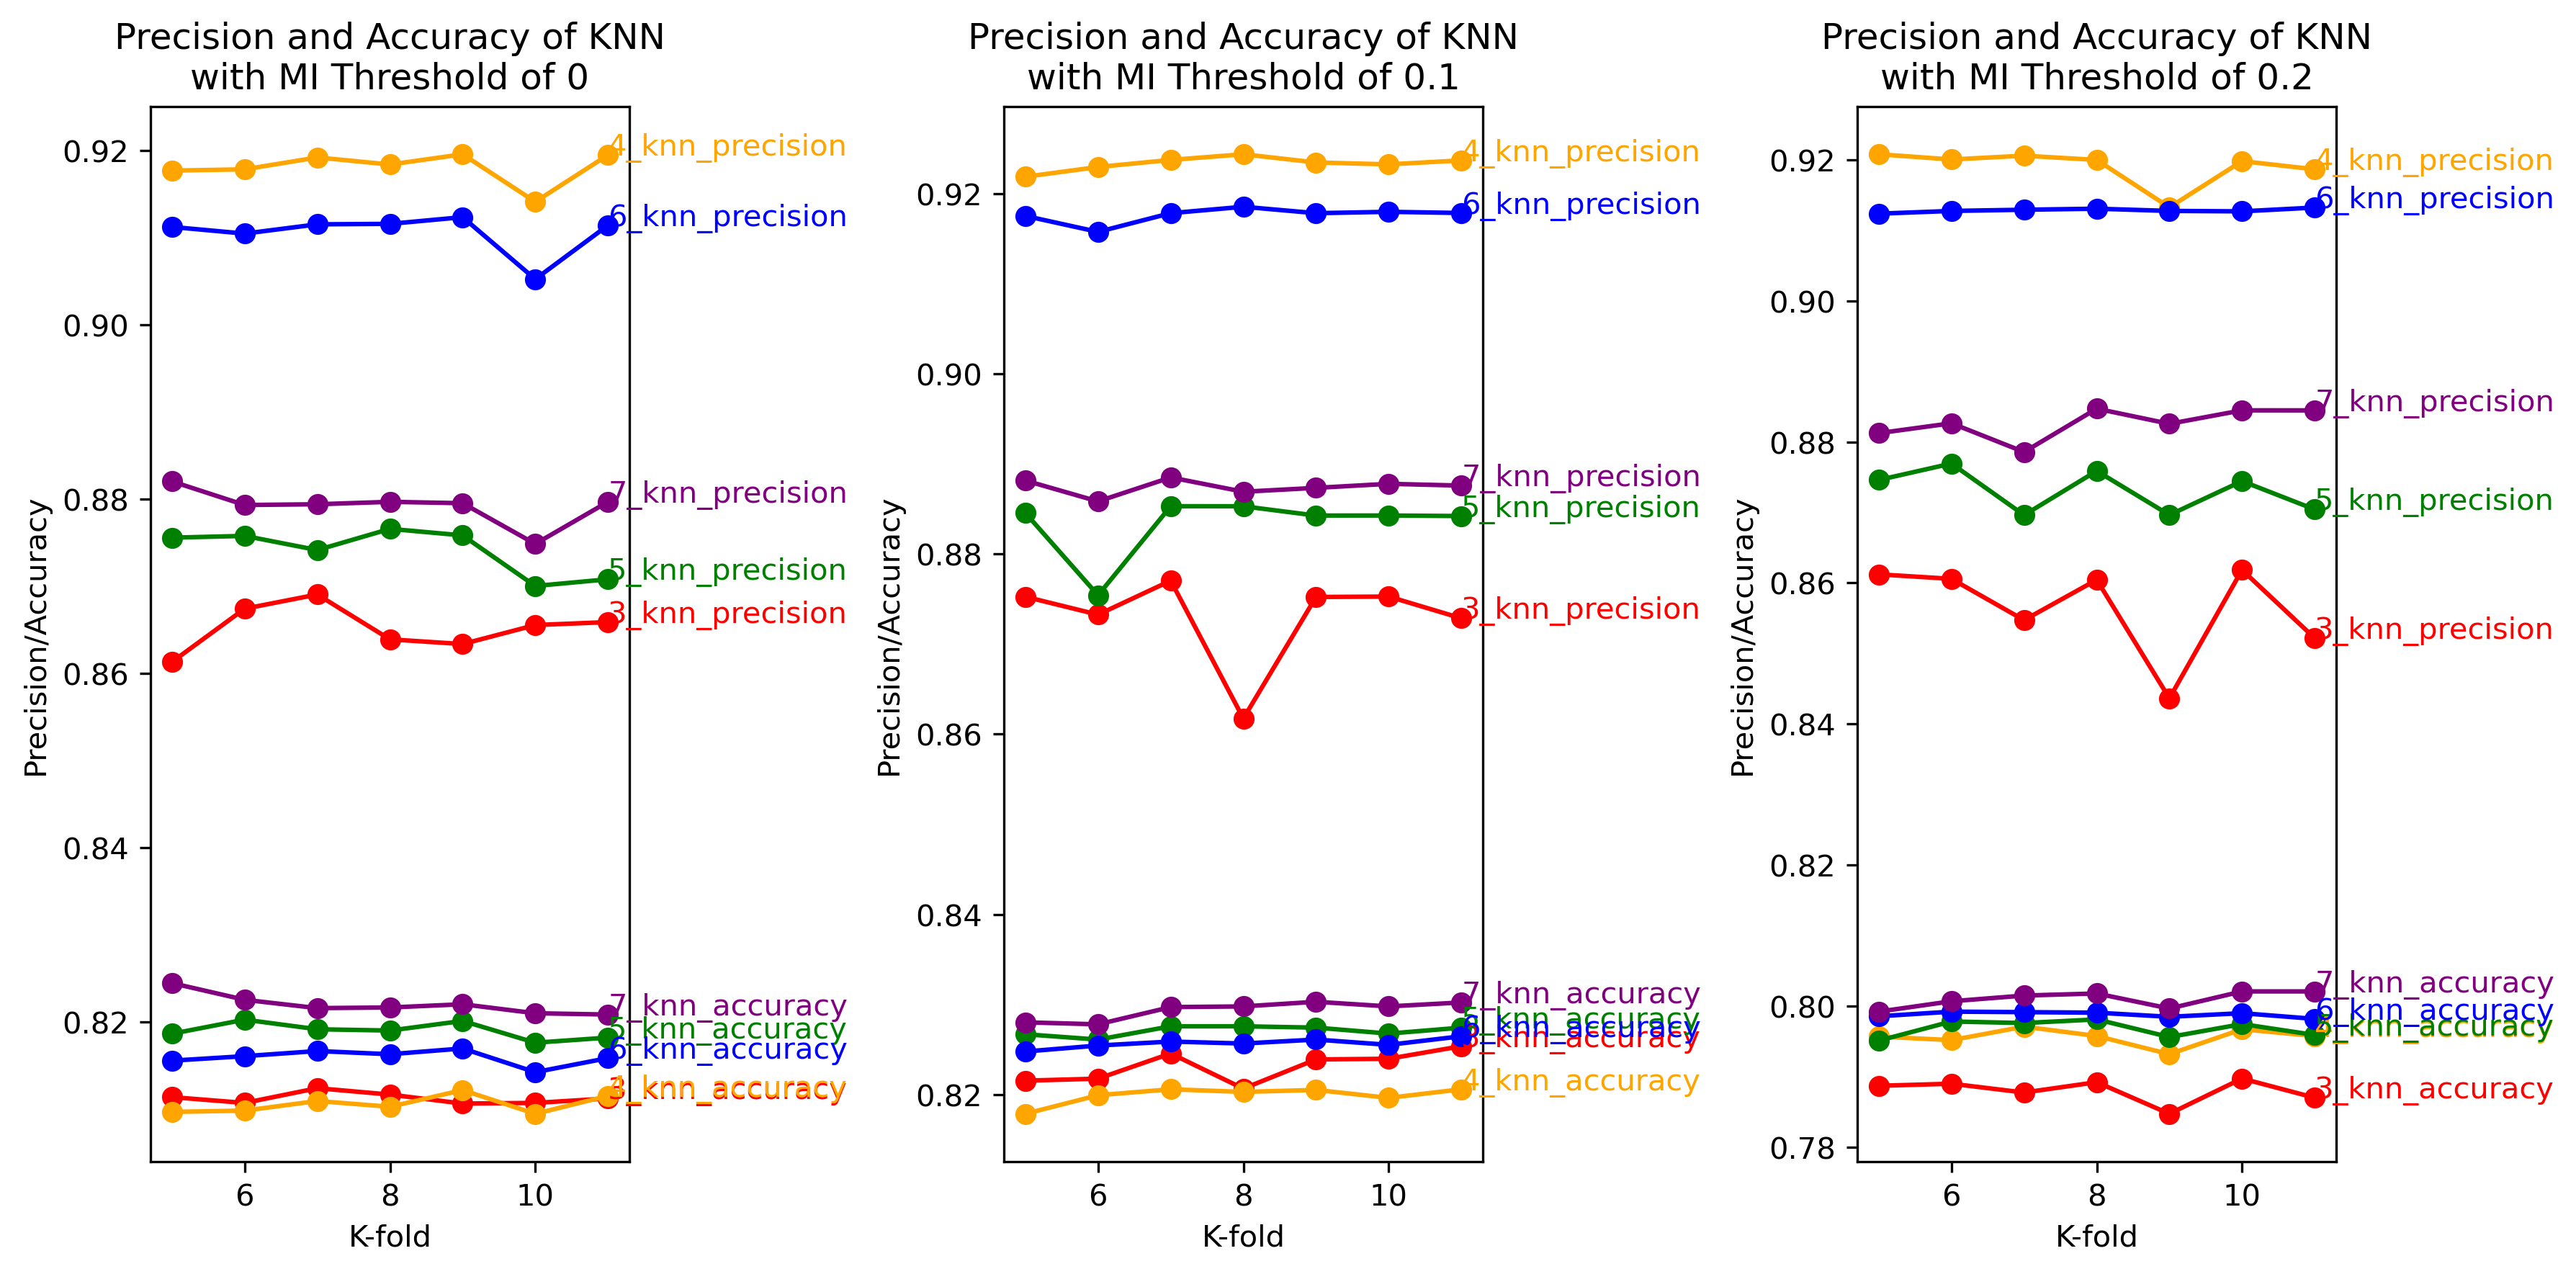

In [18]:
graph(knn_final_results)

# Decision Tree

In [13]:
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [14]:
'''
Function takes training DataFrame, k, and a random seed as argument, performs k-fold cross validation,
returns an array of accuracy scores
'''
def kfold_CV_dt(df_train, filtered_features, k=10, seed=42):
    kf_CV = KFold(n_splits=k, shuffle=True, random_state=seed)
    metrics = ["accuracy", "precision"]
    results = defaultdict(list)

    for train_idx, test_idx in kf_CV.split(df_train):
        # Train-validate split for training data
        X_train_2, X_validate = df_train[filtered_features].iloc[list(train_idx)], df_train[filtered_features].iloc[list(test_idx)]
        Y_train_2, Y_validate = df_train['role'].iloc[list(train_idx)], df_train['role'].iloc[list(test_idx)]

        new_X_train = X_train_2[filtered_features]
        
        # Set up decision tree
        dt = DecisionTreeClassifier(criterion='entropy')
        dt.fit(new_X_train, Y_train_2)

        Y_predict = dt.predict(X_validate[filtered_features])
        cm = confusion_matrix(Y_validate, Y_predict)   # calculate confusion matrix

        curr_result = calc_and_print_metrics(cm, False)

        for metric in metrics:
            results[metric].append(curr_result[metric])

    return results

Tuning hyper-parameters for decision tree:
- Finding k for k-fold cross validation
- Determining the optimal threshold Mutual Information for feature selection

In [19]:
dt_final_results = rec_dd()
mi_arr = MIC(X=X_train, y=Y_train, discrete_features=True) #Utilizing mutual information
for k in range(5, 12):
    for threshold in {0, 0.1, 0.2}:
        filtered_features = []
        for feature, mi in zip(X_train.columns, mi_arr):
            if(mi >= threshold): #Filtering out any features below threshold
                filtered_features.append(feature)
        dt_final_results[k][threshold] = kfold_CV_dt(df_train, filtered_features, k=k)

# Get highest accuracy and precision
highest_accuracy = {"val": 0, "k-fold": 0, "mi": 0}
highest_precision = {"val": 0, "k-fold": 0, "mi": 0}

mean_accuracy = []
mean_precision = []
for k in range(5, 12):
    all_accuracy = []
    all_precision = []
    for threshold in dt_final_results[k]:
        all_accuracy.append(dt_final_results[k][threshold]["accuracy"])
        all_precision.append(dt_final_results[k][threshold]["precision"])
        dt_final_results[k][threshold]["accuracy"] = curr_accuracy = np.mean(dt_final_results[k][threshold]["accuracy"])
        dt_final_results[k][threshold]["precision"] = curr_precision = np.mean(dt_final_results[k][threshold]["precision"])
        if (curr_accuracy > highest_accuracy["val"]):
            highest_accuracy["val"] = curr_accuracy
            highest_accuracy["k-fold"] = k
            highest_accuracy["mi"] = threshold
        if (curr_precision > highest_precision["val"]):
            highest_precision["val"] = curr_precision
            highest_precision["mi"] = threshold
            highest_precision["k-fold"] = k

    mean_accuracy.append(np.mean(all_accuracy))
    mean_precision.append(np.mean(all_precision))

print(f"Accuracy: {dt_final_results[7][0]['accuracy']}")
print(f"Precision: {dt_final_results[7][0]['precision']}")

Accuracy: 0.8008094985443232
Precision: 0.8511996452033571


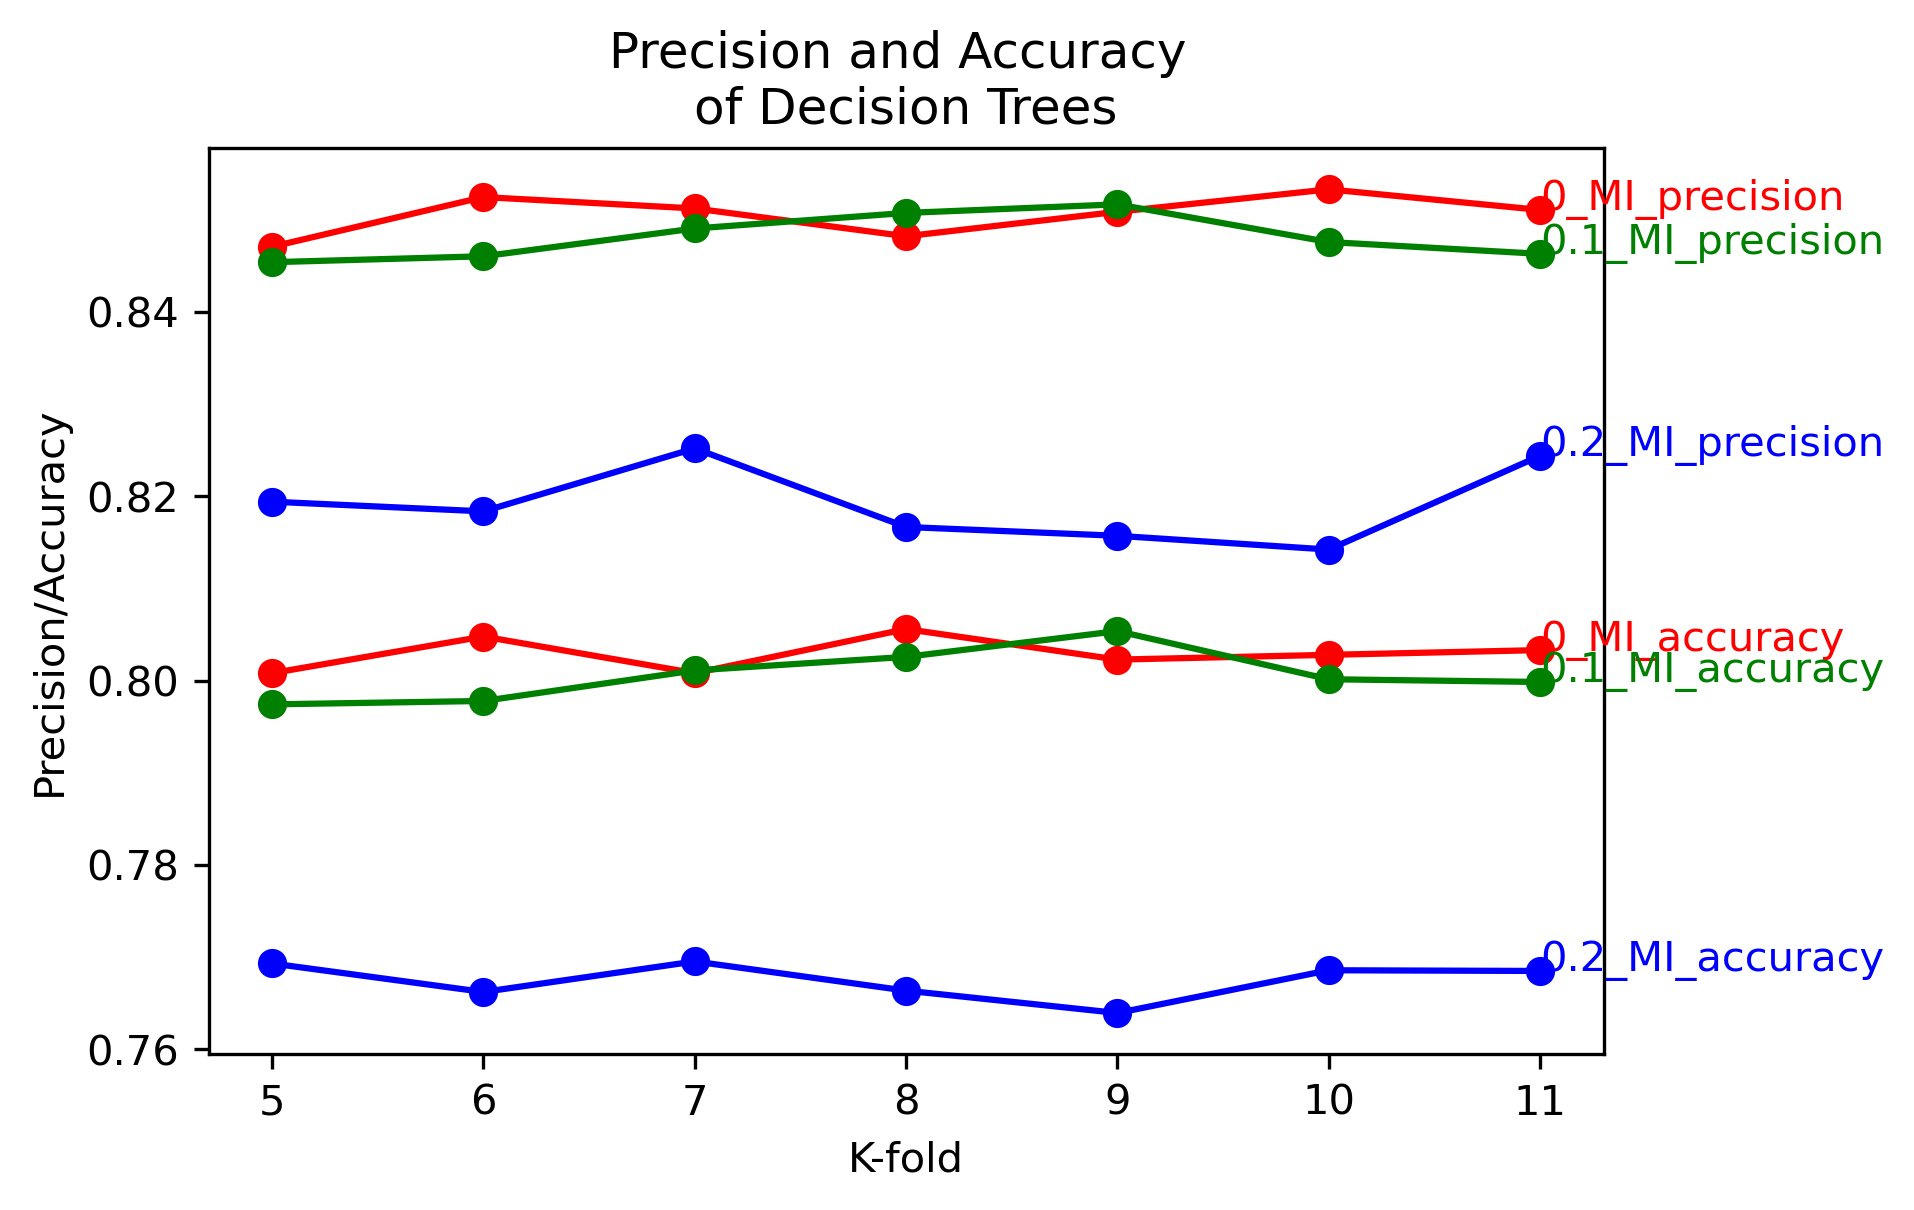

In [20]:
graph(dt_final_results, False)

* From the output and the graph, 7-fold cross validation has the highest accuracy and precision

# Final Evaluation on Test Set

Comparing performance of k-nearest neighbour and decision tree, k-nearest neighbour has higher accuracy and precision. So we choose k-nearest neighbour as our final model

In [24]:
'''
FINAL EVALUATION
'''

THRESHOLD = 0.1
KNN_K = 4
filtered_features = []
for feature, mi in zip(X_train.columns, mi_arr):
    if(mi >= THRESHOLD): #Filtering out any features below threshold
        filtered_features.append(feature)

'''
INSERT KNN ALGO
'''
X_train = df_train[filtered_features]
Y_train = df_train['role']
X_test = df_test[filtered_features]
Y_test = df_test['role']

# Training
knn = KNeighborsClassifier(n_neighbors=KNN_K)
knn.fit(X_train, Y_train)

# Predictions
Y_pred = knn.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
curr_result = calc_and_print_metrics(cm, False)
curr_result

{'cm': array([[1874,  166],
        [ 571,  785]]),
 'precision': 0.9186274509803921,
 'recall': 0.7664621676891615,
 'f1': 0.8356744704570791,
 'accuracy': 0.782979976442874,
 'specificity': 0.825446898002103}